# Speed dating predicton
 - [Kaggle Speed dating experiment](https://www.kaggle.com/annavictoria/speed-dating-experiment)
 - Learning fun [Siraj's DL #5](https://www.youtube.com/watch?v=koiTTim4M-s)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df['match'].head()

0    0
1    0
2    1
3    1
4    1
Name: match, dtype: int64

In [4]:
df.shape

(8378, 195)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


### First of all, let's just seperate features and labels

In [6]:
df, df_labels = df.drop(['match'], axis=1), df['match']

# 1. Preprocessing Data
 - 1.1 Cleaning
 - 1.2 Transformation
 - 1.3 Reduction by PCA

## 1.1 Cleaning

### Cleaning null features
If a feature has more than 30% (2513) of values are null, we just drop whole column. 

In [7]:
na_sum = list(df.isnull().sum())
na_col = list(df.isnull().sum().index)
print(len(na_sum))
print(len(na_col))

194
194


In [8]:
drop_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 2523:
        drop_col.append(na_col[i])
print("We can drop ",len(drop_col)," Columns")

We can drop  83  Columns


In [9]:
df = df.drop(drop_col,axis=1)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


### Imputing null values with mean

In [10]:
df = df.fillna(df.mean())

In [11]:
#check if any NaN values
df.isnull().values.any()

True

#### This means there are still columns which have null values. Let's further check.

In [12]:
na_sum = list(df.isnull().sum())
na_col = list(df.isnull().sum().index)
nan_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 0:
        nan_col.append(na_col[i])
nan_col

['field', 'from', 'zipcode', 'career']

In [13]:
df[['field', 'from', 'zipcode', 'career']].head()

,field,from,zipcode,career
0,Law,Chicago,"60,521",lawyer
1,Law,Chicago,"60,521",lawyer
2,Law,Chicago,"60,521",lawyer
3,Law,Chicago,"60,521",lawyer
4,Law,Chicago,"60,521",lawyer


#### These columns are values with object type. It is hard to predict null values for these variables. So, let's just drop all these variables. 

In [14]:
df = df.drop(['from','zipcode','field','career'], axis=1)

In [15]:
df.isnull().values.any()

False

#### We have sucessfully cleaned all null variables in our datasets. 

## 1.2 Transformation

### Normalize data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(df)

In [18]:
X.shape

(8378, 107)

## 1.3 Reduction

### PCA
 - Find out what is fairly good value for n_components according to the Explained Variance Ratio
 - Reduce dimensions by the n_components

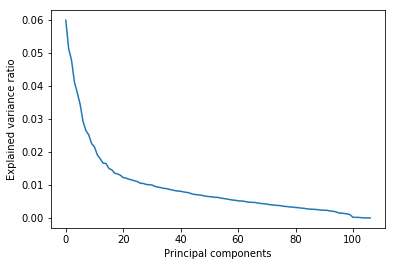

In [19]:
#PCA In Sklearn
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,107), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

#### From above figure, we will choose 80 as the dimensions of Principal components.

In [20]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 80)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end = '\n\n')
print(pca.explained_variance_ratio_)

[[-0.11278981  0.43893968 -3.99012359 ...,  1.16465672  0.56729192
  -0.64840363]
 [-0.46084624  0.17902122 -3.58831169 ...,  1.07119852  0.41197209
  -0.5985692 ]
 [-2.6167787   2.52342764 -5.04277805 ...,  1.27507324  0.43043921
  -0.45224509]
 ..., 
 [ 4.29349594  3.11397991  8.86818098 ...,  1.69816398 -0.24422571
   0.97286625]
 [ 3.06349273  4.87790152  7.91930278 ...,  1.16860411 -1.13151726
  -0.30835054]
 [ 1.8720148   5.70640366  7.50899149 ...,  1.46975842 -0.75691331
  -0.20733703]]

[ 0.0599287   0.05130629  0.04778579  0.04120846  0.03794963  0.03442235
  0.02928028  0.02648273  0.02516247  0.02253369  0.02148449  0.01909422
  0.01792891  0.01660708  0.01649287  0.01499748  0.01459388  0.0135756
  0.01335547  0.01295986  0.01223028  0.01205562  0.01173874  0.01152741
  0.01122597  0.01099925  0.01050502  0.01044228  0.01014914  0.0100701
  0.00998956  0.00958081  0.00934085  0.009218    0.00898175  0.00889461
  0.00866534  0.00851306  0.00827405  0.00815348  0.00807849  0

In [21]:
sum(pca.explained_variance_ratio_)

0.9543749739279761

In [22]:
x_pca.shape

(8378, 80)

# 2. Model Training
We'll do three models and compare the prediction results:
 - 2.1 Manually made neural network
 - 2.2 Tensorflow
 - 2.3 SVM
 - 2.3 Logistic regression

### Train and Test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, df_labels, test_size=0.2, random_state=0)

In [24]:
X_train.shape

(6702, 80)

In [25]:
X_train

array([[-4.68464192, -2.82486661, -1.51037053, ...,  0.1217759 ,
        -0.74243317,  0.11222527],
       [-0.74018306,  1.56521968, -0.06997892, ..., -0.06948208,
         0.34386785,  0.46882373],
       [ 1.74612791, -3.12552361,  1.71795876, ...,  0.34551246,
         0.52357637,  0.30381041],
       ..., 
       [ 0.75099899, -2.49960638, -1.5116067 , ..., -0.32051221,
        -0.04223522,  0.46622875],
       [-3.9346281 ,  2.84871802, -1.62336145, ...,  0.18952497,
         0.14344933,  0.07057387],
       [-1.56477168, -1.87060719, -0.83035729, ..., -0.48866565,
        -0.6775755 , -0.13887963]])

## 2.1 Manual Neural Network

In [26]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
        #self.logistic_classifier = lambda x : 1 if x > 0.5 else 0
    
    def train(self, inputs_array, targets_array):
        # Convert inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        m = inputs_array.shape[0] # number of records
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
        # TODO: Output layer
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error  
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        # TODO: Backpropagated error
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors * 1  # hidden layer gradients y = x -> 1
        
        # TODO: Update the weights
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
 
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

In [27]:
### Set the hyperparameters here ###
epochs = 1000 #100
learning_rate = 0.01 #0.1
hidden_nodes = 40 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

network.train(X_train, y_train)

y_pred = network.run(X_test)

In [28]:
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

In [29]:
y_pred[:,0:30]

array([[1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 1]])

In [30]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred[0]))

0.648568019093


## 2.2 Tensorflow

In [31]:
import tensorflow as tf

In [32]:
# Build one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'keep_checkpoint_every_n_hours': 10000, 'keep_checkpoint_max': 5, '_evaluation_master': '', 'save_summary_steps': 100, '_task_id': 0, 'save_checkpoints_secs': 600, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_is_chief': True, '_environment': 'local', 'save_checkpoints_steps': None, '_num_ps_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021BB1CAEE10>, '_master': '', '_task_type': None, 'tf_random_seed': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

In [33]:
print('TF Accuracy: ', score)

TF Accuracy:  0.999403341289


## 2.3 SVM

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [35]:
y_pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
print('SVM Accuracy: ', metrics.accuracy_score(y_test,y_pred))

SVM Accuracy:  0.994630071599


## 2.4 Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [39]:
print('Log Regression Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Log Regression Accuracy:  1.0


# 3. Summary
 - Manual NN: 0.648568019093. Something wrong with my Neural Network.
 - TF Accuracy:  0.999403341289
 - SVM Accuracy:  0.994630071599
 - Log Regression Accuracy:  1.0